# Keras API Project Exercise

## The Data

We will be using a subset of the LendingClub DataSet obtained from Kaggle: https://www.kaggle.com/wordsforthewise/lending-club

## NOTE: Do not download the full zip from the link! We provide a special version of this file that has some extra feature engineering for you to do. You won't be able to follow along with the original file!

LendingClub is a US peer-to-peer lending company, headquartered in San Francisco, California.[3] It was the first peer-to-peer lender to register its offerings as securities with the Securities and Exchange Commission (SEC), and to offer loan trading on a secondary market. LendingClub is the world's largest peer-to-peer lending platform.

### Our Goal

Given historical data on loans given out with information on whether or not the borrower defaulted (charge-off), can we build a model thatcan predict wether or nor a borrower will pay back their loan? This way in the future when we get a new potential customer we can assess whether or not they are likely to pay back the loan. Keep in mind classification metrics when evaluating the performance of your model!

The "loan_status" column contains our label.

### Data Overview

----
-----
There are many LendingClub data sets on Kaggle. Here is the information on this particular data set:

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>LoanStatNew</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>loan_amnt</td>
      <td>The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.</td>
    </tr>
    <tr>
      <th>1</th>
      <td>term</td>
      <td>The number of payments on the loan. Values are in months and can be either 36 or 60.</td>
    </tr>
    <tr>
      <th>2</th>
      <td>int_rate</td>
      <td>Interest Rate on the loan</td>
    </tr>
    <tr>
      <th>3</th>
      <td>installment</td>
      <td>The monthly payment owed by the borrower if the loan originates.</td>
    </tr>
    <tr>
      <th>4</th>
      <td>grade</td>
      <td>LC assigned loan grade</td>
    </tr>
    <tr>
      <th>5</th>
      <td>sub_grade</td>
      <td>LC assigned loan subgrade</td>
    </tr>
    <tr>
      <th>6</th>
      <td>emp_title</td>
      <td>The job title supplied by the Borrower when applying for the loan.*</td>
    </tr>
    <tr>
      <th>7</th>
      <td>emp_length</td>
      <td>Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.</td>
    </tr>
    <tr>
      <th>8</th>
      <td>home_ownership</td>
      <td>The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER</td>
    </tr>
    <tr>
      <th>9</th>
      <td>annual_inc</td>
      <td>The self-reported annual income provided by the borrower during registration.</td>
    </tr>
    <tr>
      <th>10</th>
      <td>verification_status</td>
      <td>Indicates if income was verified by LC, not verified, or if the income source was verified</td>
    </tr>
    <tr>
      <th>11</th>
      <td>issue_d</td>
      <td>The month which the loan was funded</td>
    </tr>
    <tr>
      <th>12</th>
      <td>loan_status</td>
      <td>Current status of the loan</td>
    </tr>
    <tr>
      <th>13</th>
      <td>purpose</td>
      <td>A category provided by the borrower for the loan request.</td>
    </tr>
    <tr>
      <th>14</th>
      <td>title</td>
      <td>The loan title provided by the borrower</td>
    </tr>
    <tr>
      <th>15</th>
      <td>zip_code</td>
      <td>The first 3 numbers of the zip code provided by the borrower in the loan application.</td>
    </tr>
    <tr>
      <th>16</th>
      <td>addr_state</td>
      <td>The state provided by the borrower in the loan application</td>
    </tr>
    <tr>
      <th>17</th>
      <td>dti</td>
      <td>A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.</td>
    </tr>
    <tr>
      <th>18</th>
      <td>earliest_cr_line</td>
      <td>The month the borrower's earliest reported credit line was opened</td>
    </tr>
    <tr>
      <th>19</th>
      <td>open_acc</td>
      <td>The number of open credit lines in the borrower's credit file.</td>
    </tr>
    <tr>
      <th>20</th>
      <td>pub_rec</td>
      <td>Number of derogatory public records</td>
    </tr>
    <tr>
      <th>21</th>
      <td>revol_bal</td>
      <td>Total credit revolving balance</td>
    </tr>
    <tr>
      <th>22</th>
      <td>revol_util</td>
      <td>Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.</td>
    </tr>
    <tr>
      <th>23</th>
      <td>total_acc</td>
      <td>The total number of credit lines currently in the borrower's credit file</td>
    </tr>
    <tr>
      <th>24</th>
      <td>initial_list_status</td>
      <td>The initial listing status of the loan. Possible values are – W, F</td>
    </tr>
    <tr>
      <th>25</th>
      <td>application_type</td>
      <td>Indicates whether the loan is an individual application or a joint application with two co-borrowers</td>
    </tr>
    <tr>
      <th>26</th>
      <td>mort_acc</td>
      <td>Number of mortgage accounts.</td>
    </tr>
    <tr>
      <th>27</th>
      <td>pub_rec_bankruptcies</td>
      <td>Number of public record bankruptcies</td>
    </tr>
  </tbody>
</table>

---
----

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#df_info = pd.read_csv('../DATA/lending_club_info.csv')
df = pd.read_csv('./lending_club_loan_two.csv')

In [3]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

In [5]:
df.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648
std,8357.441341,4.472157,250.727790,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


<Axes: >

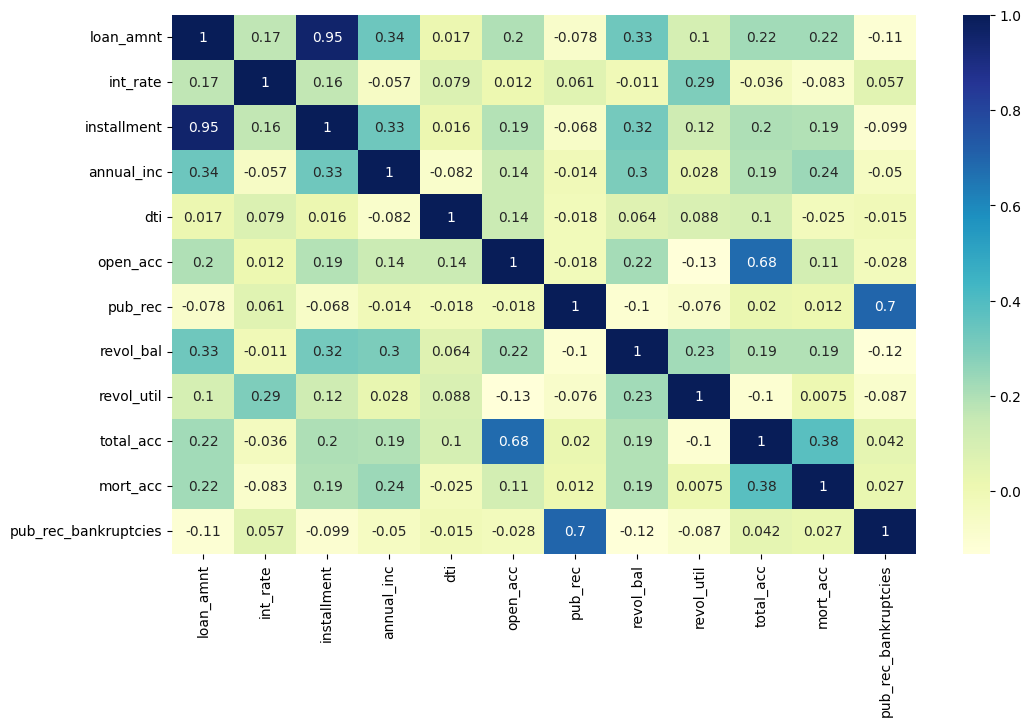

In [6]:
plt.figure(figsize=(12, 7))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap = 'YlGnBu')

<Axes: xlabel='loan_status', ylabel='count'>

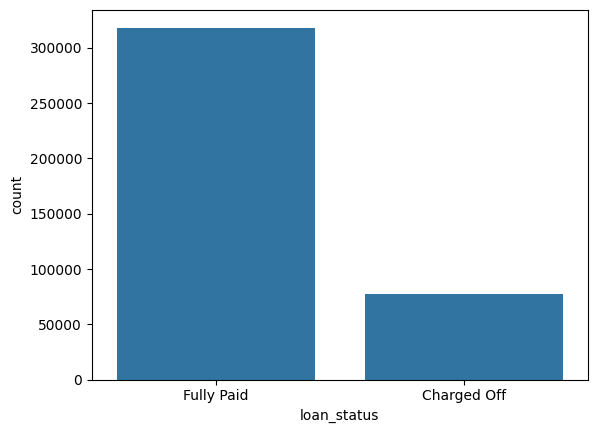

In [7]:
sns.countplot(data = df, x = 'loan_status')

<Axes: xlabel='loan_amnt', ylabel='Count'>

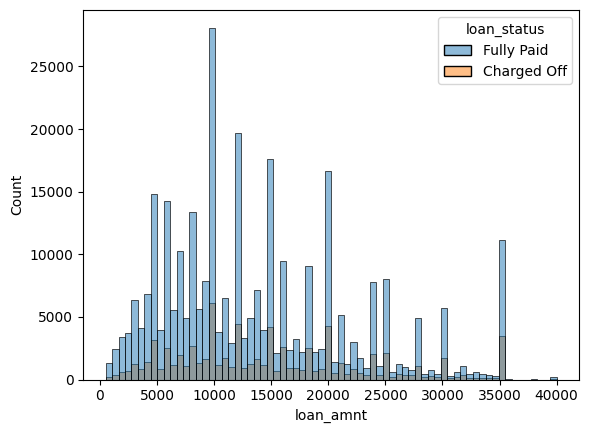

In [8]:
sns.histplot(data = df, x = 'loan_amnt', bins = 70, hue = 'loan_status')

In [9]:
##remove unused columns
df.drop(['emp_title', 'title'], axis = 1, inplace=True)

In [10]:
df_org = df
print(df.isnull().sum()[df.isnull().sum() > 0])
df_org.head()

emp_length              18301
revol_util                276
mort_acc                37795
pub_rec_bankruptcies      535
dtype: int64


,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,10+ years,RENT,117000.0,Not Verified,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,4 years,MORTGAGE,65000.0,Not Verified,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,< 1 year,RENT,43057.0,Source Verified,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,6 years,RENT,54000.0,Not Verified,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,9 years,MORTGAGE,55000.0,Verified,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


## Missing values ##

#### emp_title and emp_length ####

<Axes: xlabel='emp_length'>

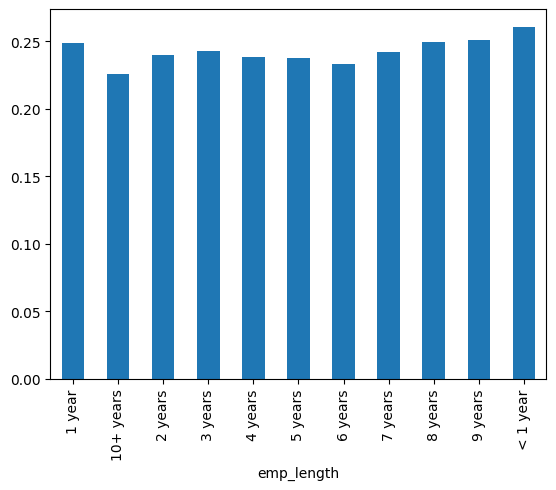

In [11]:
paid_emp = df[df['loan_status'] == 'Fully Paid'].groupby('emp_length')['loan_status'].count()
not_paid_emp = df[df['loan_status'] != 'Fully Paid'].groupby('emp_length')['loan_status'].count()

not_paid_perc = not_paid_emp / (paid_emp)
not_paid_perc.plot(kind = 'bar')


In [12]:
#old part - data conversion
def change_emp_len(x, default = -1):
    x = str(x)
    if x == '10+ years':
        res = 11
    elif x == '< 1 year':
        res = 0
    elif len(x) > 5:
        res = int(x[:2])
    else:
        res = default
    return int(res)



In [13]:


df

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,10+ years,RENT,117000.0,Not Verified,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,4 years,MORTGAGE,65000.0,Not Verified,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,< 1 year,RENT,43057.0,Source Verified,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,6 years,RENT,54000.0,Not Verified,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,9 years,MORTGAGE,55000.0,Verified,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60 months,10.99,217.38,B,B4,2 years,RENT,40000.0,Source Verified,...,6.0,0.0,1990.0,34.3,23.0,w,INDIVIDUAL,0.0,0.0,"12951 Williams Crossing\nJohnnyville, DC 30723"
396026,21000.0,36 months,12.29,700.42,C,C1,5 years,MORTGAGE,110000.0,Source Verified,...,6.0,0.0,43263.0,95.7,8.0,f,INDIVIDUAL,1.0,0.0,"0114 Fowler Field Suite 028\nRachelborough, LA..."
396027,5000.0,36 months,9.99,161.32,B,B1,10+ years,RENT,56500.0,Verified,...,15.0,0.0,32704.0,66.9,23.0,f,INDIVIDUAL,0.0,0.0,"953 Matthew Points Suite 414\nReedfort, NY 70466"
396028,21000.0,60 months,15.31,503.02,C,C2,10+ years,MORTGAGE,64000.0,Verified,...,9.0,0.0,15704.0,53.8,20.0,f,INDIVIDUAL,5.0,0.0,"7843 Blake Freeway Apt. 229\nNew Michael, FL 2..."


<Axes: xlabel='emp_len', ylabel='count'>

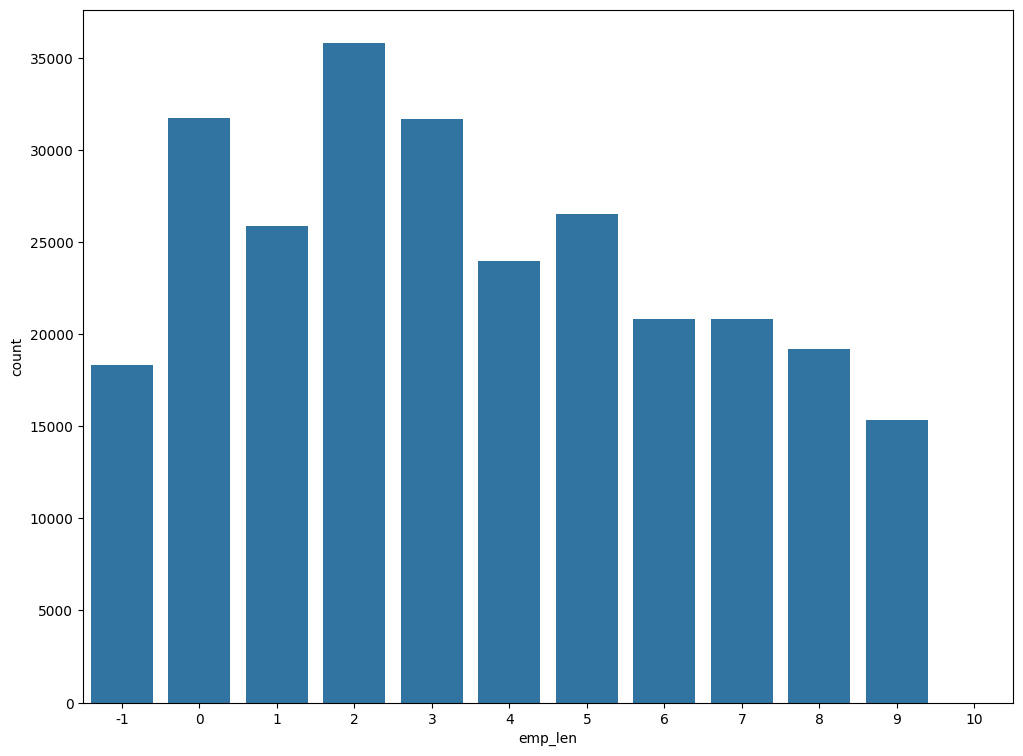

In [14]:
df['emp_len'] = df['emp_length'].apply(change_emp_len)

fig, axes = plt.subplots(figsize=(12, 9))
sns.countplot(data = df, x = 'emp_len', order = range(-1, 11))


In [15]:
mean_emp_len = df[df['emp_len']>0]['emp_len'].mean()
df['emp_len'] = df['emp_length'].apply(change_emp_len, default = mean_emp_len)

df.drop('emp_length', axis = 1, inplace = True)

In [16]:
print(df.isnull().sum()[df.isnull().sum() > 0])
df_org.head()

revol_util                276
mort_acc                37795
pub_rec_bankruptcies      535
dtype: int64


,loan_amnt,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,emp_len
0,10000.0,36 months,11.44,329.48,B,B4,RENT,117000.0,Not Verified,Jan-2015,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",11
1,8000.0,36 months,11.99,265.68,B,B5,MORTGAGE,65000.0,Not Verified,Jan-2015,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",4
2,15600.0,36 months,10.49,506.97,B,B3,RENT,43057.0,Source Verified,Jan-2015,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",0
3,7200.0,36 months,6.49,220.65,A,A2,RENT,54000.0,Not Verified,Nov-2014,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",6
4,24375.0,60 months,17.27,609.33,C,C5,MORTGAGE,55000.0,Verified,Apr-2013,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",9


#### mort_acc ####

In [17]:
#df['mort_acc'].value_counts()
print(df[df['loan_status'] == 'Charged Off']['mort_acc'].describe())
df[df['loan_status'] == 'Fully Paid']['mort_acc'].describe()

count    72123.000000
mean         1.501213
std          1.974353
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max         23.000000
Name: mort_acc, dtype: float64


count    286112.000000
mean          1.892836
std           2.182456
min           0.000000
25%           0.000000
50%           1.000000
75%           3.000000
max          34.000000
Name: mort_acc, dtype: float64

<Axes: xlabel='mort_acc', ylabel='Count'>

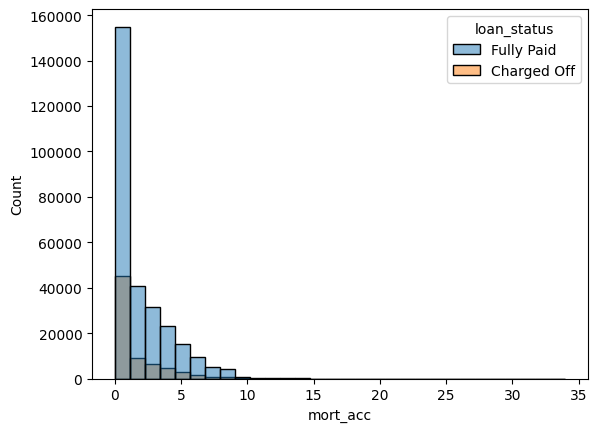

In [18]:
sns.histplot(data = df, x = 'mort_acc', bins = 30, hue = 'loan_status')


In [19]:
map = df.groupby('total_acc')['mort_acc'].mean()

In [20]:

df['mort_acc'] = df['total_acc'].apply(lambda x: map[x])
#df['mort_acc'].fillna(value = 0, inplace=True)


#### revol_unit and pub_rec_bankruptcies ####

In [21]:
df['revol_util'].describe()

count    395754.000000
mean         53.791749
std          24.452193
min           0.000000
25%          35.800000
50%          54.800000
75%          72.900000
max         892.300000
Name: revol_util, dtype: float64

<Axes: >

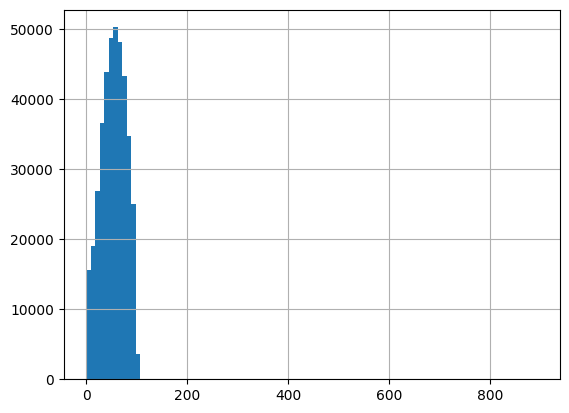

In [22]:
df['revol_util'].hist(bins = 100)

In [23]:
df['revol_util'].fillna(value = np.mean(df['revol_util']), inplace=True)

In [24]:
print(df['pub_rec_bankruptcies'].value_counts())
print(df[df['loan_status'] == 'Charged Off']['pub_rec_bankruptcies'].describe())
df[df['loan_status'] == 'Fully Paid']['pub_rec_bankruptcies'].describe()

pub_rec_bankruptcies
0.0    350380
1.0     42790
2.0      1847
3.0       351
4.0        82
5.0        32
6.0         7
7.0         4
8.0         2
Name: count, dtype: int64
count    77586.000000
mean         0.128412
std          0.368853
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          8.000000
Name: pub_rec_bankruptcies, dtype: float64


count    317909.000000
mean          0.119997
std           0.352992
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           8.000000
Name: pub_rec_bankruptcies, dtype: float64

<Axes: xlabel='pub_rec_bankruptcies', ylabel='Count'>

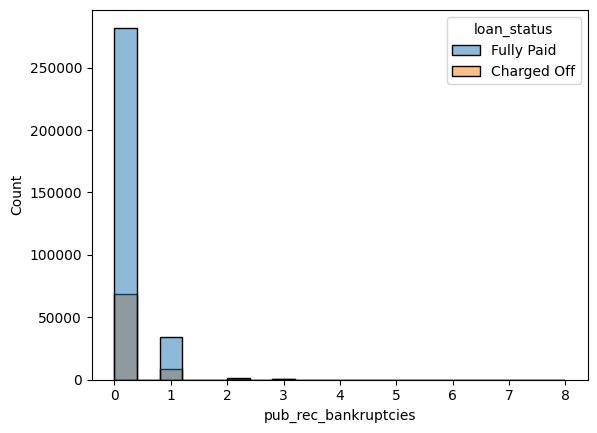

In [25]:
sns.histplot(data = df, x = 'pub_rec_bankruptcies', bins = 20, hue = 'loan_status')

In [26]:
#df['pub_rec_bankruptcies'].fillna(value = 0, inplace=True)

df.dropna(inplace = True)

## Categorical data ##

In [27]:
print(df.columns)
df.head()


Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'dti', 'earliest_cr_line', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'application_type', 'mort_acc',
       'pub_rec_bankruptcies', 'address', 'emp_len'],
      dtype='object')


,loan_amnt,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,emp_len
0,10000.0,36 months,11.44,329.48,B,B4,RENT,117000.0,Not Verified,Jan-2015,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,1.900506,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",11
1,8000.0,36 months,11.99,265.68,B,B5,MORTGAGE,65000.0,Not Verified,Jan-2015,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,2.103573,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",4
2,15600.0,36 months,10.49,506.97,B,B3,RENT,43057.0,Source Verified,Jan-2015,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,1.987414,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",0
3,7200.0,36 months,6.49,220.65,A,A2,RENT,54000.0,Not Verified,Nov-2014,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.722124,0.0,"823 Reid Ford\nDelacruzside, MA 00813",6
4,24375.0,60 months,17.27,609.33,C,C5,MORTGAGE,55000.0,Verified,Apr-2013,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,2.997056,0.0,"679 Luna Roads\nGreggshire, VA 11650",9


#### term ####

In [28]:
df['term_time'] = df['term'].apply(lambda x: int(x[:3]))
df.drop('term', axis = 1, inplace=True)

#### grade and sub_grade ####

<Axes: xlabel='sub_grade', ylabel='count'>

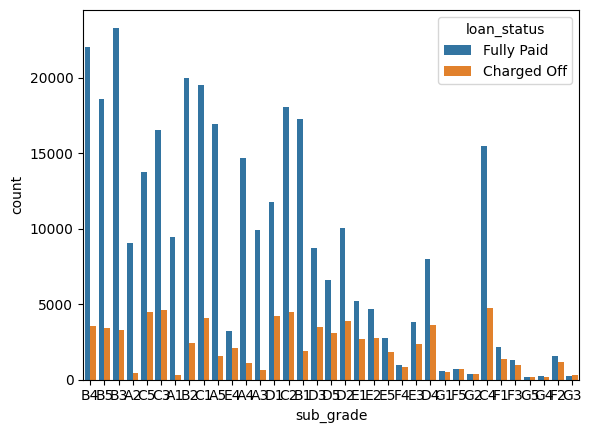

In [29]:
sns.countplot(data = df, x = 'sub_grade', hue = 'loan_status')

<Axes: xlabel='grade', ylabel='count'>

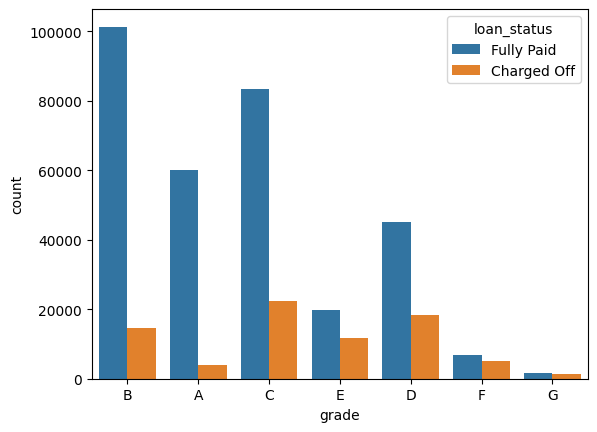

In [30]:
sns.countplot(data = df, x = 'grade', hue = 'loan_status')

In [31]:
#df = pd.concat([df, pd.get_dummies(df['grade'], dtype = int, drop_first = True)], axis = 1)
df = pd.concat([df, pd.get_dummies(df['sub_grade'], dtype = int, drop_first = True)], axis = 1)

In [32]:
df.drop(['grade', 'sub_grade'], axis = 1, inplace = True)
df.head()


,loan_amnt,int_rate,installment,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,...,F1,F2,F3,F4,F5,G1,G2,G3,G4,G5
0,10000.0,11.44,329.48,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,26.24,...,0,0,0,0,0,0,0,0,0,0
1,8000.0,11.99,265.68,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,22.05,...,0,0,0,0,0,0,0,0,0,0
2,15600.0,10.49,506.97,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,12.79,...,0,0,0,0,0,0,0,0,0,0
3,7200.0,6.49,220.65,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,2.60,...,0,0,0,0,0,0,0,0,0,0
4,24375.0,17.27,609.33,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,33.95,...,0,0,0,0,0,0,0,0,0,0


#### home_ownership ####

In [33]:
df['home_ownership'] = df['home_ownership'].apply(lambda x: 'OTHER' if x == 'ANY' or x == 'NONE' else x)

dummies = pd.get_dummies(df['home_ownership'], dtype = int, drop_first = True)
df = pd.concat([df, dummies], axis = 1)
df.drop('home_ownership', axis = 1, inplace = True)


#### purpose ####

In [34]:
dummies = pd.get_dummies(df['purpose'], dtype = int, drop_first = True)
df = pd.concat([df, dummies], axis = 1)
df.drop('purpose', axis = 1, inplace = True)

#### verification_status ####

In [35]:
df = pd.concat([df, pd.get_dummies(df['verification_status'], dtype = int, drop_first=True)], axis = 1)
df.drop(['verification_status'], axis = 1, inplace = True)

#### earliest_cr_line ####

In [36]:
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'])
df['earliest_cr_line_year'] = df['earliest_cr_line'].dt.year
#df['earliest_cr_line_month'] = df['earliest_cr_line'].dt.month

df.drop(['earliest_cr_line'], axis = 1, inplace = True)

C:\Users\wgrzynd\AppData\Local\Temp\ipykernel_17728\1878642808.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'])


#### initial_list_status, application_type ####

In [37]:
df = pd.concat([df, pd.get_dummies(df['initial_list_status'], dtype = int, drop_first = True)], axis = 1)
df.drop(['initial_list_status'], axis = 1, inplace = True)

In [38]:
df = pd.concat([df, pd.get_dummies(df['application_type'], dtype = int, drop_first = True)], axis = 1)
df.drop(['application_type'], axis = 1, inplace = True)

#### zip code ####

In [39]:
df['zipcode'] = df['address'].str[-5:]
dummies = pd.get_dummies(df['zipcode'], dtype = int, drop_first = True)
df = pd.concat([df, dummies], axis = 1)
df.drop(['zipcode', 'address'], axis = 1, inplace = True)

In [40]:
print(df.columns)
df.head()

Index(['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'issue_d',
       'loan_status', 'dti', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'mort_acc', 'pub_rec_bankruptcies', 'emp_len', 'term_time',
       'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3',
       'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5',
       'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5', 'OTHER',
       'OWN', 'RENT', 'credit_card', 'debt_consolidation', 'educational',
       'home_improvement', 'house', 'major_purchase', 'medical', 'moving',
       'other', 'renewable_energy', 'small_business', 'vacation', 'wedding',
       'Source Verified', 'Verified', 'earliest_cr_line_year', 'w',
       'INDIVIDUAL', 'JOINT', '05113', '11650', '22690', '29597', '30723',
       '48052', '70466', '86630', '93700'],
      dtype='object')


,loan_amnt,int_rate,installment,annual_inc,issue_d,loan_status,dti,open_acc,pub_rec,revol_bal,...,JOINT,05113,11650,22690,29597,30723,48052,70466,86630,93700
0,10000.0,11.44,329.48,117000.0,Jan-2015,Fully Paid,26.24,16.0,0.0,36369.0,...,0,0,0,1,0,0,0,0,0,0
1,8000.0,11.99,265.68,65000.0,Jan-2015,Fully Paid,22.05,17.0,0.0,20131.0,...,0,1,0,0,0,0,0,0,0,0
2,15600.0,10.49,506.97,43057.0,Jan-2015,Fully Paid,12.79,13.0,0.0,11987.0,...,0,1,0,0,0,0,0,0,0,0
3,7200.0,6.49,220.65,54000.0,Nov-2014,Fully Paid,2.60,6.0,0.0,5472.0,...,0,0,0,0,0,0,0,0,0,0
4,24375.0,17.27,609.33,55000.0,Apr-2013,Charged Off,33.95,13.0,0.0,24584.0,...,0,0,1,0,0,0,0,0,0,0


#### change labels to 0 and 1 ####

In [41]:
df['loan_status_bin'] = df['loan_status'].apply(lambda x : 1 if x == 'Fully Paid' else 0)

#### drop unnecessary columns ####

In [42]:
df.drop(['loan_status'], axis = 1, inplace = True)
df.drop(['issue_d'], axis = 1, inplace = True)

In [43]:
pd.set_option('display.max_rows', None)
df.iloc[1]

loan_amnt                 8000.000000
int_rate                    11.990000
installment                265.680000
annual_inc               65000.000000
dti                         22.050000
open_acc                    17.000000
pub_rec                      0.000000
revol_bal                20131.000000
revol_util                  53.300000
total_acc                   27.000000
mort_acc                     2.103573
pub_rec_bankruptcies         0.000000
emp_len                      4.000000
term_time                   36.000000
A2                           0.000000
A3                           0.000000
A4                           0.000000
A5                           0.000000
B1                           0.000000
B2                           0.000000
B3                           0.000000
B4                           0.000000
B5                           1.000000
C1                           0.000000
C2                           0.000000
C3                           0.000000
C4          

## Model ##

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler

In [45]:
X = df.drop('loan_status_bin', axis=1)
y = df['loan_status_bin']

In [46]:
X.isnull().sum()

loan_amnt                0
int_rate                 0
installment              0
annual_inc               0
dti                      0
open_acc                 0
pub_rec                  0
revol_bal                0
revol_util               0
total_acc                0
mort_acc                 0
pub_rec_bankruptcies     0
emp_len                  0
term_time                0
A2                       0
A3                       0
A4                       0
A5                       0
B1                       0
B2                       0
B3                       0
B4                       0
B5                       0
C1                       0
C2                       0
C3                       0
C4                       0
C5                       0
D1                       0
D2                       0
D3                       0
D4                       0
D5                       0
E1                       0
E2                       0
E3                       0
E4                       0
E

In [47]:
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.2, random_state=101)

In [48]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.metrics import BinaryAccuracy, Precision
from tensorflow.keras.optimizers import Adam


In [49]:
#scaler = MinMaxScaler()
scaler = RobustScaler(quantile_range=(1, 90))

In [50]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [51]:
X_train.shape

(316396, 79)

In [52]:
# CODE HERE
model = Sequential()

model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer=Adam() 
                ,loss = 'binary_crossentropy'
                ,metrics = [Precision()]
              
             )

early_stop = EarlyStopping(monitor='val_loss', mode = 'min', verbose = 1, patience = 25)

In [53]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', mode = 'min', verbose = 1, patience = 25)

In [54]:
model.fit(x = X_train, y = y_train, epochs = 250, validation_data=(X_test, y_test)
          ,callbacks = [early_stop]
          ,batch_size = 1024
         )

Epoch 1/250

309/309 [==============================] - 3s 4ms/step - loss: 0.3776 - precision: 0.8533 - val_loss: 0.2913 - val_precision: 0.8779
Epoch 2/250
309/309 [==============================] - 1s 3ms/step - loss: 0.2804 - precision: 0.8841 - val_loss: 0.2687 - val_precision: 0.8810
Epoch 3/250
309/309 [==============================] - 1s 4ms/step - loss: 0.2679 - precision: 0.8846 - val_loss: 0.2643 - val_precision: 0.8813
Epoch 4/250
309/309 [==============================] - 1s 3ms/step - loss: 0.2632 - precision: 0.8844 - val_loss: 0.2629 - val_precision: 0.8789
Epoch 5/250
309/309 [==============================] - 1s 3ms/step - loss: 0.2609 - precision: 0.8845 - val_loss: 0.2608 - val_precision: 0.8808
Epoch 6/250
309/309 [==============================] - 1s 4ms/step - loss: 0.2592 - precision: 0.8846 - val_loss: 0.2601 - val_precision: 0.8851
Epoch 7/250
309/309 [==============================] - 1s 4ms/step - loss: 0.2581 - precision: 0.8849 - val_loss: 0.2596 - val_pr

In [55]:
from sklearn.linear_model import LogisticRegression, Ridge, Lasso
from sklearn.metrics import confusion_matrix, classification_report

In [56]:
logreg = Ridge()

In [57]:
logreg.fit(X_train, y_train)

Ridge()

In [58]:
y_pred = logreg.predict(X_test)

In [59]:
y_classes = np.where(y_pred > 0.5, 1, 0)

print(classification_report(y_test, y_classes))
confusion_matrix(y_test, y_classes)

              precision    recall  f1-score   support

           0       1.00      0.43      0.60     15683
           1       0.88      1.00      0.93     63416

    accuracy                           0.89     79099
   macro avg       0.94      0.71      0.77     79099
weighted avg       0.90      0.89      0.87     79099



array([[ 6674,  9009],
       [    0, 63416]], dtype=int64)

In [60]:
losses = pd.DataFrame(model.history.history)

In [61]:
losses.head()

,loss,precision,val_loss,val_precision
0,0.377565,0.853265,0.291266,0.877915
1,0.280358,0.884145,0.268715,0.881015
2,0.267938,0.884608,0.264267,0.881306
3,0.263159,0.884359,0.262897,0.878929
4,0.260866,0.884549,0.260848,0.880787


<Axes: >

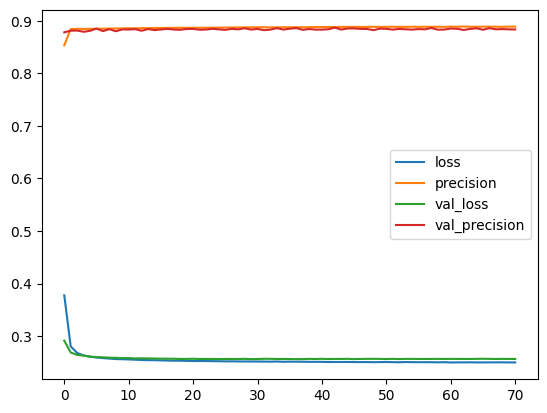

In [62]:
#10 epochs would be enough
losses.plot()

In [63]:
y_pred = model.predict(X_test)
y_classes = np.where(y_pred > 0.5, 1, 0)

2472/2472 [==============================] - 3s 1ms/step


In [64]:
print(set(y_pred[:, 0]))

{0.97228366, 1.0, 0.9494685, 0.9998422, 0.9999806, 0.937671, 0.8698387, 0.9980896, 0.9114417, 0.6119046, 0.64151025, 0.86653006, 0.7761561, 0.7730898, 0.7178572, 0.79110974, 0.74937344, 0.92905146, 0.9075671, 0.9231826, 0.9998617, 0.9046374, 0.64290917, 0.8806832, 0.8289254, 0.9998238, 0.81623006, 0.84703916, 0.87718105, 0.86118037, 0.7668947, 0.731729, 0.73562574, 0.9016603, 0.7981352, 0.92311627, 0.63013804, 0.70044106, 0.8000315, 3.6988015e-10, 0.9282628, 0.90293324, 0.99912465, 0.9224645, 0.6495153, 0.926798, 0.7936193, 0.7887975, 0.80002797, 0.8049718, 0.9992313, 0.7570438, 0.9249841, 0.8624746, 0.78434014, 0.79603994, 0.93666494, 0.65345234, 0.84680223, 0.9073491, 0.84287703, 0.77451766, 0.5928581, 0.8975456, 0.6045768, 0.9307392, 0.6787861, 0.8232984, 0.88970464, 0.7432013, 0.88966674, 0.7315417, 0.86995995, 0.9999838, 0.9439251, 0.72041434, 0.9519912, 0.7163955, 0.82011735, 0.7356447, 0.69559616, 0.6865133, 0.8837505, 0.95600665, 0.79975665, 2.1435662e-10, 0.92788714, 0.8310854

In [65]:
print(classification_report(y_test, y_classes))
confusion_matrix(y_test, y_classes)

              precision    recall  f1-score   support

           0       0.93      0.47      0.62     15683
           1       0.88      0.99      0.93     63416

    accuracy                           0.89     79099
   macro avg       0.90      0.73      0.78     79099
weighted avg       0.89      0.89      0.87     79099



array([[ 7386,  8297],
       [  593, 62823]], dtype=int64)